In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("sales_data.csv")
df.head()

,product_id,customer_id,product_category,customer_segment,sales,discount,date
0,45,772,A,n,NaN,NaN,2020-01-01
1,48,532,B,X,899.0,0.009975,2020-01-02
2,65,911,B,X,156.0,0.016297,2020-01-03
3,68,180,B,Y,695.0,0.053541,2020-01-04
4,68,375,B,Y,948.0,0.259404,2020-01-05


In [5]:
df.isnull().sum()

product_id            0
customer_id           0
product_category      0
customer_segment      0
sales               100
discount             50
date                  0
dtype: int64

In [6]:
# There is some missing value in sales and discount . so we replace it by mean of their values.
df['sales'].fillna(df['sales'].mean(), inplace=True)
df['discount'].fillna(df['discount'].mean(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_6932\303415875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sales'].fillna(df['sales'].mean(), inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_6932\303415875.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [7]:
df

,product_id,customer_id,product_category,customer_segment,sales,discount,date
0,45,772,A,n,548.101515,0.148943,2020-01-01
1,48,532,B,X,899.000000,0.009975,2020-01-02
2,65,911,B,X,156.000000,0.016297,2020-01-03
3,68,180,B,Y,695.000000,0.053541,2020-01-04
4,68,375,B,Y,948.000000,0.259404,2020-01-05
...,...,...,...,...,...,...,...
9995,52,355,C,X,451.000000,0.279545,2047-05-14
9996,74,322,B,Y,363.000000,0.199699,2047-05-15
9997,38,763,B,X,889.000000,0.163797,2047-05-16
9998,26,31,A,X,703.000000,0.259372,2047-05-17


In [8]:
df.isnull().sum()
# Here it is no missing value in each column.

product_id          0
customer_id         0
product_category    0
customer_segment    0
sales               0
discount            0
date                0
dtype: int64

In [12]:
grouped_data = df.groupby(['product_category', 'customer_segment']).agg({
    'sales': 'sum',
    'discount': ['sum', 'mean'],
    'sales': 'count'
}).reset_index()
# Renaming the columns for better clarity
grouped_data.columns = ['product_category', 'customer_segment', 'sale', 'discount', 'Average Discount']

# Displaying the grouped and aggregated DataFrame
print(grouped_data)

   product_category customer_segment  sale    discount  Average Discount
0                 A                X   817  120.921583          0.148007
1                 A                Y   818  120.434401          0.147230
2                 A                Z   871  127.450047          0.146326
3                 A                n    12    1.602691          0.133558
4                 B                X   824  122.122175          0.148207
5                 B                Y   867  130.757452          0.150816
6                 B                Z   832  124.700611          0.149881
7                 B                n     9    1.527047          0.169672
8                 C                X   872  127.621472          0.146355
9                 C                Y   789  118.298629          0.149935
10                C                Z   805  118.954110          0.147769
11                C                n     8    1.191266          0.148908
12                D                X   794  118.026

In [19]:
product_details_data = pd.DataFrame({
    'product_id': ['P001', 'P002', 'P003'],
    'product_name': ['Product A', 'Product B', 'Product C'],
    'category': ['Category 1', 'Category 2', 'Category 1']
})

df['product_id'] = df['product_id'].astype(str) # convert int to string fr product id

# Merging sales data with product details based on product ID
merged_data = pd.merge(df, product_details_data, on='product_id', how='left')

# Displaying the merged DataFrame
print(merged_data)

     product_id  customer_id product_category customer_segment       sales  \
0            45          772                A                n  548.101515   
1            48          532                B                X  899.000000   
2            65          911                B                X  156.000000   
3            68          180                B                Y  695.000000   
4            68          375                B                Y  948.000000   
...         ...          ...              ...              ...         ...   
9995         52          355                C                X  451.000000   
9996         74          322                B                Y  363.000000   
9997         38          763                B                X  889.000000   
9998         26           31                A                X  703.000000   
9999         46          816                D                Y  149.000000   

      discount        date product_name category  
0     0.1489

In [20]:
# for statistical analysis
df.describe()
df

,product_id,customer_id,product_category,customer_segment,sales,discount,date
0,45,772,A,n,548.101515,0.148943,2020-01-01
1,48,532,B,X,899.000000,0.009975,2020-01-02
2,65,911,B,X,156.000000,0.016297,2020-01-03
3,68,180,B,Y,695.000000,0.053541,2020-01-04
4,68,375,B,Y,948.000000,0.259404,2020-01-05
...,...,...,...,...,...,...,...
9995,52,355,C,X,451.000000,0.279545,2047-05-14
9996,74,322,B,Y,363.000000,0.199699,2047-05-15
9997,38,763,B,X,889.000000,0.163797,2047-05-16
9998,26,31,A,X,703.000000,0.259372,2047-05-17


In [23]:
#df.head()
df.tail()

,product_id,customer_id,product_category,customer_segment,sales,discount,date
9995,52,355,C,X,451.0,0.279545,2047-05-14
9996,74,322,B,Y,363.0,0.199699,2047-05-15
9997,38,763,B,X,889.0,0.163797,2047-05-16
9998,26,31,A,X,703.0,0.259372,2047-05-17
9999,46,816,D,Y,149.0,0.093816,2047-05-18


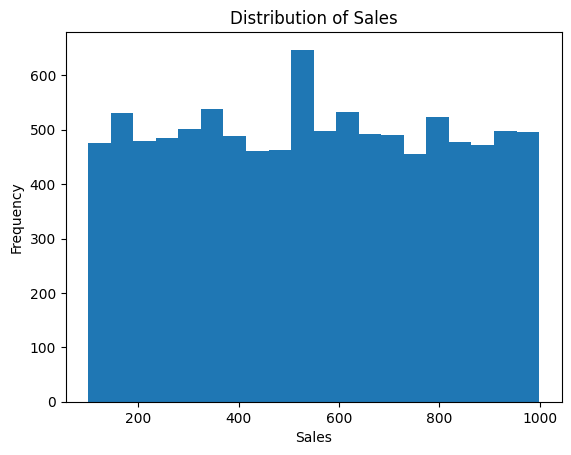

In [26]:
# Now we use some visualization
# Histogram of sales
import matplotlib.pyplot as plt

df['sales'].plot.hist(bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()
